<a href="https://www.kaggle.com/code/abdunnayeemkhan/k-means-to-find-kevin-debruyne-like-players?scriptVersionId=109563109" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **K-means to find players like Kevin DeBruyne**
Our Idea is to run a clustering model on a dataset to find out players with similar playing style as Kevin DeBruyne. Kevin has an exceptional record in the premier league. This year also he's having a very good season so far. My idea is to find players who are similar to KDB and visualize the entire process in this notebook

**Installing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random
from sklearn.cluster import KMeans

**Reading the dataset**

The dataset has been collected and modified from https://fbref.com/en/

In [2]:
df = pd.read_csv("../input/epl-2223-dataset-before-world-cup/epl_22-23_player_data.csv")

**Dataset Info**

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,1,Brenden Aaronson,us USA,"MF,FW",Leeds United,22-001,2000,9.3,27,2.91,15,6,2,1,1,2,3,0.32,1,0,0,1,0,1
1,2,Che Adams,sct SCO,FW,Southampton,26-102,1996,8.9,18,2.01,12,1,1,3,1,0,1,0.11,1,0,0,0,0,0
2,3,Tyler Adams,us USA,MF,Leeds United,23-251,1999,10.0,18,1.80,17,0,1,0,0,0,0,0.00,0,0,0,0,0,0
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-029,1997,9.0,3,0.33,3,0,0,0,0,0,0,0.00,0,0,0,0,0,0
4,5,Rayan Aït Nouri,fr FRA,DF,Wolves,21-139,2001,7.2,13,1.80,10,0,3,0,0,0,0,0.00,0,0,0,0,0,0


**Cleaning the Dataset**

First we rename some of the columns to more readable column title

In [4]:
df = df.rename(columns={'PassLive': 'PassLive_sca', 'PassDead': 'PassDead_sca','Drib': 'Drib_sca', 'Sh': 'Sh_sca', 'Fld': 'Fld_sca', 'Def': 'Def_sca'})
df = df.rename(columns={'PassLive.1': 'PassLive_gca', 'PassDead.1': 'PassDead_gca','Drib.1': 'Drib_gca', 'Sh.1': 'Sh_gca', 'Fld.1': 'Fld_gca', 'Def.1': 'Def_gca'})

df.columns.values

array(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'SCA', 'SCA90', 'PassLive_sca', 'PassDead_sca', 'Drib_sca',
       'Sh_sca', 'Fld_sca', 'Def_sca', 'GCA', 'GCA90', 'PassLive_gca',
       'PassDead_gca', 'Drib_gca', 'Sh_gca', 'Fld_gca', 'Def_gca'],
      dtype=object)

In [5]:
#Cleaning the player column to display names without '/' and taking the full name of nation from the 'Nation' column.
#Also taking the first position two letter for players who have 2 positions assigned

We clean the player names which have '/' in their name. We also want to use their full nation name, so we only take the second part of nation. Finally, we'll take only the first positonif a player has multiple positions assigned to themselves

In [6]:
df['Player'] = df['Player'].str.split('\\', expand=True)
df['Nation'] = df['Nation'].str.split(' ', expand=True)[1]
df['Pos'] = df['Pos'].str[:2]

In [7]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca
0,1,Brenden Aaronson,USA,MF,Leeds United,22-001,2000,9.3,27,2.91,15,6,2,1,1,2,3,0.32,1,0,0,1,0,1
1,2,Che Adams,SCO,FW,Southampton,26-102,1996,8.9,18,2.01,12,1,1,3,1,0,1,0.11,1,0,0,0,0,0
2,3,Tyler Adams,USA,MF,Leeds United,23-251,1999,10.0,18,1.80,17,0,1,0,0,0,0,0.00,0,0,0,0,0,0
3,4,Tosin Adarabioyo,ENG,DF,Fulham,25-029,1997,9.0,3,0.33,3,0,0,0,0,0,0,0.00,0,0,0,0,0,0
4,5,Rayan Aït Nouri,FRA,DF,Wolves,21-139,2001,7.2,13,1.80,10,0,3,0,0,0,0,0.00,0,0,0,0,0,0


****SCA Ratio****

In [8]:
#Calculate the SCA ratio for each of the sca property
#list features which contribute to shot creation

We'll create some more columns for us to have the ratio for each of the SCA properties. The SCA properties give us information about their actions which led to a shot.

In [9]:
df['Pass SCA Ratio'] = df['PassLive_sca']/df['SCA']
df['Deadball SCA Ratio'] = df['PassDead_sca']/df['SCA']
df['Dribble SCA Ratio'] = df['Drib_sca']/df['SCA']
df['Shot SCA Ratio'] = df['Sh_sca']/df['SCA']
df['Fouls Drawn SCA Ratio'] = df['Fld_sca']/df['SCA']
df['Defense SCA Ratio'] = df['Def_sca']/df['SCA']

All the necessary features which we will use in clustering method are added to the list below

In [10]:
sca_features = ['Pass SCA Ratio', 'Deadball SCA Ratio', 'Dribble SCA Ratio', 'Shot SCA Ratio', 'Fouls Drawn SCA Ratio', 'Defense SCA Ratio']

**Exploring KDB stats and finding players close to him**

In [11]:
#Visualizing KDB's stats

As we want player's similar to KDB's playstyle, we have a look at KDB's stat in this dataset

In [12]:
kdb = df[df['Player'] == "Kevin De Bruyne"]

In [13]:
kdb

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio
103,104,Kevin De Bruyne,BEL,MF,Manchester City,31-117,1991,9.6,56,5.85,37,11,1,5,1,1,16,1.67,14,1,0,1,0,0,0.660714,0.196429,0.017857,0.089286,0.017857,0.017857


He has an incredible SCA and GCA record. We'll come to the comparative analysis later on.

Let us see 3 of the most important playing feautures of KDB

In [14]:
fig = px.scatter_3d(kdb,x="Pass SCA Ratio",y="Deadball SCA Ratio",z="Shot SCA Ratio",color="Player",text="Player",
                    title="KDB Live pass sca vs deadball sca pass vs sca from shots")
fig.update_traces(textposition='top center')
figsize=(18,8)
fig.show()

In [15]:
#removing players with less playtime and less contribution to total SCA to get better results

In out dataframe we don't want players who has played less minutes. As we are calculating ratio for each of the SCA features, these players with less minutes and less contribution might cause biaseness in our clustering.

In [16]:
new_df = df[(df["90s"] > 5) & (df["SCA"] > 9)]

In [17]:
#visualizing some of the midfielders liveball vs deadball vs shot sca

We have a look at some features of the midfield players only in our 3d scatter model

In [18]:
mid = new_df[new_df['Pos'] == "MF"]

In [19]:
fig = px.scatter_3d(mid,x="Pass SCA Ratio",y="Deadball SCA Ratio",z="Shot SCA Ratio",color="Player",
                    title="MID Live pass sca vs deadball sca pass vs sca from shots")
fig.update_traces(textposition='top center')
figsize=(18,8)
fig.show()

In [20]:
#Implementing k-means clustering with sca features

Here, we select a random cluster number 6 to see if this algorithm can divide the dataset in a meaningful way of 6 clusters.

In [21]:
kmeans = KMeans(n_clusters = 6, init = 'random', random_state = 0)
p_kmeans = kmeans.fit_predict(new_df[sca_features])

In [22]:
p_kmeans

array([2, 4, 3, 5, 2, 4, 1, 3, 5, 3, 1, 3, 5, 3, 3, 5, 4, 3, 5, 3, 3, 5,
       5, 5, 2, 5, 2, 5, 3, 3, 3, 2, 5, 1, 5, 5, 5, 3, 4, 3, 2, 0, 3, 5,
       4, 5, 3, 2, 4, 2, 2, 1, 5, 5, 4, 0, 5, 3, 3, 2, 3, 3, 2, 4, 0, 1,
       5, 4, 3, 5, 5, 4, 3, 5, 1, 5, 2, 5, 2, 1, 5, 2, 4, 2, 4, 1, 5, 2,
       5, 2, 5, 3, 5, 5, 5, 2, 5, 3, 0, 2, 4, 3, 5, 1, 5, 4, 3, 0, 3, 3,
       3, 4, 2, 5, 3, 4, 3, 5, 5, 5, 4, 5, 4, 2, 3, 5, 1, 0, 5, 1, 0, 5,
       5, 3, 2, 5, 4, 3, 4, 3, 1, 5], dtype=int32)

In [23]:
new_df["Cluster"] = p_kmeans

In [24]:
new_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
0,1,Brenden Aaronson,USA,MF,Leeds United,22-001,2000,9.3,27,2.91,15,6,2,1,1,2,3,0.32,1,0,0,1,0,1,0.555556,0.222222,0.074074,0.037037,0.037037,0.074074,2
1,2,Che Adams,SCO,FW,Southampton,26-102,1996,8.9,18,2.01,12,1,1,3,1,0,1,0.11,1,0,0,0,0,0,0.666667,0.055556,0.055556,0.166667,0.055556,0.000000,4
2,3,Tyler Adams,USA,MF,Leeds United,23-251,1999,10.0,18,1.80,17,0,1,0,0,0,0,0.00,0,0,0,0,0,0,0.944444,0.000000,0.055556,0.000000,0.000000,0.000000,3
4,5,Rayan Aït Nouri,FRA,DF,Wolves,21-139,2001,7.2,13,1.80,10,0,3,0,0,0,0,0.00,0,0,0,0,0,0,0.769231,0.000000,0.230769,0.000000,0.000000,0.000000,5
10,11,Trent Alexander-Arnold,ENG,DF,Liverpool,24-016,1998,8.2,36,4.41,23,11,0,2,0,0,2,0.24,2,0,0,0,0,0,0.638889,0.305556,0.000000,0.055556,0.000000,0.000000,2


In [25]:
#Assigning colors and labels to clusters for scatter plots

In [26]:
def plotClusters(xAxis, yAxis):
    plt.scatter(new_df[new_df['Cluster']==0][xAxis], new_df[new_df['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(new_df[new_df['Cluster']==1][xAxis], new_df[new_df['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(new_df[new_df['Cluster']==2][xAxis], new_df[new_df['Cluster']==2][yAxis], s=40, c='yellow', label ='Cluster 3')
    plt.scatter(new_df[new_df['Cluster']==3][xAxis], new_df[new_df['Cluster']==3][yAxis], s=40, c='brown', label ='Cluster 4')
    plt.scatter(new_df[new_df['Cluster']==4][xAxis], new_df[new_df['Cluster']==4][yAxis], s=40, c='green', label ='Cluster 5')
    plt.scatter(new_df[new_df['Cluster']==5][xAxis], new_df[new_df['Cluster']==5][yAxis], s=40, c='orange', label ='Cluster 6')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend() 

Let us visualize the clusters based on some of the SCA feautures.

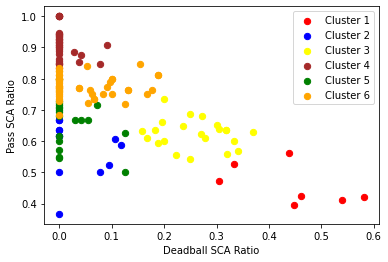

In [27]:
plotClusters('Deadball SCA Ratio', 'Pass SCA Ratio')

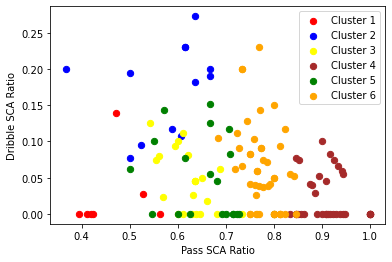

In [28]:
plotClusters('Pass SCA Ratio', 'Dribble SCA Ratio')

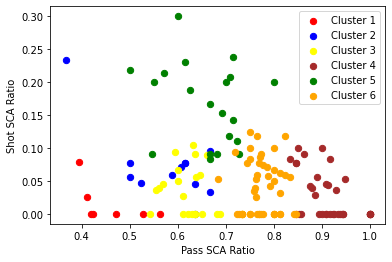

In [29]:
plotClusters('Pass SCA Ratio', 'Shot SCA Ratio')

In [30]:
#liveball vs deadball sca for other players

In [31]:
fig = px.scatter(new_df,x="Pass SCA Ratio",y="Deadball SCA Ratio",color="Player",title="live pass vs deadball sca")
fig.update_traces(textposition='top center')
fig.show()

Ikay Gundogan seems like a player who creates shot creation chances nicely from both deadballs(set-piece,throw-ins) and liveballs(normal passes/crosses). James Ward-Prowse is another player who creates a high number of shot creation chances from Deadballs while Fabian Schar only focuses on Liveball passes. But keep in mind that this is only working with ratios. So not that big of a deal.

In [32]:
#finding out KDB's cluster number

In [33]:
new_df[new_df['Player'] == "Kevin De Bruyne"]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
103,104,Kevin De Bruyne,BEL,MF,Manchester City,31-117,1991,9.6,56,5.85,37,11,1,5,1,1,16,1.67,14,1,0,1,0,0,0.660714,0.196429,0.017857,0.089286,0.017857,0.017857,2


Our main focus is to find player who play mostly like KDB. Even if they can't reach his numbers/stats, we want to find players who have a similar playing style. Thus the ratio system helps us.

In [34]:
#Finding all players similar to KDB in terms of playstyle

In [35]:
clust2 = new_df[new_df['Cluster'] == 2]
clust2

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
0,1,Brenden Aaronson,USA,MF,Leeds United,22-001,2000,9.3,27,2.91,15,6,2,1,1,2,3,0.32,1,0,0,1,0,1,0.555556,0.222222,0.074074,0.037037,0.037037,0.074074,2
10,11,Trent Alexander-Arnold,ENG,DF,Liverpool,24-016,1998,8.2,36,4.41,23,11,0,2,0,0,2,0.24,2,0,0,0,0,0,0.638889,0.305556,0.000000,0.055556,0.000000,0.000000,2
91,92,Vladimír Coufal,CZE,DF,West Ham,30-062,1992,7.6,15,1.98,11,3,0,0,1,0,1,0.13,0,1,0,0,0,0,0.733333,0.200000,0.000000,0.000000,0.066667,0.000000,2
94,95,Aaron Cresswell,ENG,DF,West Ham,32-312,1989,9.8,27,2.76,17,10,0,0,0,0,0,0.00,0,0,0,0,0,0,0.629630,0.370370,0.000000,0.000000,0.000000,0.000000,2
103,104,Kevin De Bruyne,BEL,MF,Manchester City,31-117,1991,9.6,56,5.85,37,11,1,5,1,1,16,1.67,14,1,0,1,0,0,0.660714,0.196429,0.017857,0.089286,0.017857,0.017857,2
134,135,Christian Eriksen,DEN,MF,Manchester Utd,30-251,1992,8.7,22,2.52,14,7,1,0,0,0,3,0.34,3,0,0,0,0,0,0.636364,0.318182,0.045455,0.000000,0.000000,0.000000,2
161,162,Morgan Gibbs-White,ENG,FW,Nott'ham Forest,22-269,2000,9.0,25,2.79,14,8,2,1,0,0,2,0.22,0,2,0,0,0,0,0.560000,0.320000,0.080000,0.040000,0.000000,0.000000,2
169,170,Demarai Gray,ENG,FW,Everton,26-117,1996,11.4,32,2.80,19,6,3,3,1,0,4,0.35,3,1,0,0,0,0,0.593750,0.187500,0.093750,0.093750,0.031250,0.000000,2
172,173,Pascal Groß,GER,MF,Brighton,31-130,1991,10.2,44,4.30,25,15,1,2,1,0,4,0.39,3,0,0,0,1,0,0.568182,0.340909,0.022727,0.045455,0.022727,0.000000,2
187,188,Son Heung-min,KOR,MF,Tottenham,30-107,1992,9.4,37,3.92,23,10,3,0,1,0,5,0.53,3,1,1,0,0,0,0.621622,0.270270,0.081081,0.000000,0.027027,0.000000,2


Great! We found him in cluster 2. Now let us visualize the actual goal contribution action vs shot contribution action.

In [36]:
fig = px.scatter(clust2,x="SCA",y="GCA",color="Player",title="GCA vs SCA for cluster 2")
fig.update_traces(textposition='top center')
fig.show()

And as expected KDB is in a level of his own on the top right side with both high SCA and GCA in this cluster. But we can see Bukayo Saka has smilar traits as KDB with a lot less GCA and SCA. Point to note, we are now visualizing with actual GCA and SCA instead of ratios.

**Let us have a look at other clusters and try to find out what they mean**

In [37]:
#cluster 0 comprises of players who are active set-piece takers

In [38]:
clust0 = new_df[new_df['Cluster'] == 0]
clust0

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
137,138,Eberechi Eze,ENG,MF,Crystal Palace,24-116,1998,10.1,36,3.56,17,11,5,0,1,2,5,0.49,2,1,2,0,0,0,0.472222,0.305556,0.138889,0.000000,0.027778,0.055556,0
180,181,Jack Harrison,ENG,FW,Leeds United,25-337,1996,8.1,36,4.43,19,12,1,0,2,2,2,0.25,1,1,0,0,0,0,0.527778,0.333333,0.027778,0.000000,0.055556,0.055556,0
203,204,Mathias Jensen,DEN,MF,Brentford,26-295,1996,9.3,26,2.79,11,12,0,0,0,3,4,0.43,2,1,0,0,0,1,0.423077,0.461538,0.000000,0.000000,0.000000,0.115385,0
326,327,Andreas Pereira,BRA,MF,Fulham,26-295,1996,10.0,38,3.81,15,17,0,3,3,0,2,0.20,0,2,0,0,0,0,0.394737,0.447368,0.000000,0.078947,0.078947,0.000000,0
351,352,Andrew Robertson,SCO,DF,Liverpool,28-226,1994,6.6,16,2.42,9,7,0,0,0,0,1,0.15,0,1,0,0,0,0,0.562500,0.437500,0.000000,0.000000,0.000000,0.000000,0
416,417,Kieran Trippier,ENG,DF,Newcastle Utd,32-034,1990,10.8,39,3.60,16,21,0,1,1,0,1,0.09,1,0,0,0,0,0,0.410256,0.538462,0.000000,0.025641,0.025641,0.000000,0
433,434,James Ward-Prowse,ENG,MF,Southampton,27-356,1994,11.0,31,2.82,13,18,0,0,0,0,2,0.18,2,0,0,0,0,0,0.419355,0.580645,0.000000,0.000000,0.000000,0.000000,0


This cluster is filled with set-piece takers (corners, freekicks, throw-ins) who contribute massively to the SCA ratios.

In [39]:
fig = px.scatter(clust0,x="SCA",y="GCA",color="Player",title="GCA vs SCA for cluster 0")
fig.update_traces(textposition='top center')
fig.show()

We can see that that Eberechi Eze has a high SCA and GCA as a set-piece taker. Mathies Jensen is right behind him considering both SCA and GCA.

In [40]:
#cluster 1 comprises of players who are dribblers and mostly fouled players

In [41]:
clust1 = new_df[new_df['Cluster'] == 1]
clust1

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
19,20,Michail Antonio,JAM,FW,West Ham,32-209,1990,5.7,11,1.94,7,0,3,0,1,0,2,0.35,1,0,1,0,0,0,0.636364,0.000000,0.272727,0.000000,0.090909,0.000000,1
31,32,Jordan Ayew,GHA,FW,Crystal Palace,31-042,1991,8.1,22,2.72,14,0,4,1,3,0,2,0.25,1,0,0,0,1,0,0.636364,0.000000,0.181818,0.045455,0.136364,0.000000,1
112,113,Luis Díaz,COL,FW,Liverpool,25-283,1997,6.8,13,1.91,8,0,3,1,1,0,3,0.44,2,0,1,0,0,0,0.615385,0.000000,0.230769,0.076923,0.076923,0.000000,1
174,175,Gonçalo Guedes,POR,FW,Wolves,25-328,1996,5.8,21,3.65,11,2,2,1,5,0,1,0.17,1,0,0,0,0,0,0.523810,0.095238,0.095238,0.047619,0.238095,0.000000,1
204,205,Gabriel Jesus,BRA,FW,Arsenal,25-203,1997,9.5,36,3.77,18,0,7,2,7,2,3,0.31,2,0,0,0,1,0,0.500000,0.000000,0.194444,0.055556,0.194444,0.055556,1
251,252,Ruben Loftus-Cheek,ENG,MF,Chelsea,26-273,1996,8.7,13,1.50,8,0,3,1,1,0,1,0.12,1,0,0,0,0,0,0.615385,0.000000,0.230769,0.076923,0.076923,0.000000,1
264,265,Solly March,ENG,DF,Brighton,28-095,1994,10.5,28,2.67,17,3,3,2,3,0,3,0.29,2,0,0,1,0,0,0.607143,0.107143,0.107143,0.071429,0.107143,0.000000,1
292,293,Aleksandar Mitrović,SRB,FW,Fulham,28-037,1994,9.3,30,3.22,11,0,6,7,4,2,9,0.97,1,0,1,3,3,1,0.366667,0.000000,0.200000,0.233333,0.133333,0.066667,1
340,341,Marcus Rashford,ENG,FW,Manchester Utd,24-357,1997,9.5,21,2.21,14,0,4,2,1,0,2,0.21,2,0,0,0,0,0,0.666667,0.000000,0.190476,0.095238,0.047619,0.000000,1
412,413,Ivan Toney,ENG,FW,Brentford,26-221,1996,11.0,26,2.36,13,2,2,2,7,0,5,0.45,2,0,1,0,2,0,0.500000,0.076923,0.076923,0.076923,0.269231,0.000000,1


This cluster comprises of players who are good dribblers and contribute to the attack.

In [42]:
fig = px.scatter(clust1,x="SCA",y="GCA",color="Player",title="GCA vs SCA for cluster 1")
fig.update_traces(textposition='top center')
fig.show()

Mitrovic is player who contributes a lot to SCA among these players.

In [43]:
#players who contrbute to the midfield in a defensive manner and high contribution to goal through xAssist

In [44]:
clust3 = new_df[new_df['Cluster'] == 3]
clust3

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
2,3,Tyler Adams,USA,MF,Leeds United,23-251,1999,10.0,18,1.80,17,0,1,0,0,0,0,0.00,0,0,0,0,0,0,0.944444,0.000000,0.055556,0.000000,0.000000,0.000000,3
20,21,Antony,BRA,FW,Manchester Utd,22-241,2000,5.5,18,3.30,17,0,0,0,1,0,1,0.18,1,0,0,0,0,0,0.944444,0.000000,0.000000,0.000000,0.055556,0.000000,3
24,25,Adam Armstrong,ENG,FW,Southampton,25-255,1997,7.9,12,1.51,11,0,1,0,0,0,1,0.13,1,0,0,0,0,0,0.916667,0.000000,0.083333,0.000000,0.000000,0.000000,3
33,34,César Azpilicueta,ESP,DF,Chelsea,33-056,1989,6.0,14,2.35,14,0,0,0,0,0,1,0.17,1,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
38,39,Harvey Barnes,ENG,MF,Leicester City,24-318,1997,8.2,13,1.59,11,0,0,1,1,0,3,0.37,2,0,0,1,0,0,0.846154,0.000000,0.000000,0.076923,0.076923,0.000000,3
47,48,Rodrigo Bentancur,URU,MF,Tottenham,25-120,1997,9.8,21,2.15,18,0,0,0,1,2,4,0.41,2,0,0,0,0,2,0.857143,0.000000,0.000000,0.000000,0.047619,0.095238,3
60,61,Moisés Caicedo,ECU,MF,Brighton,20-355,2001,10.8,19,1.75,18,0,0,1,0,0,1,0.09,1,0,0,0,0,0,0.947368,0.000000,0.000000,0.052632,0.000000,0.000000,3
70,71,Matty Cash,POL,DF,Aston Villa,25-077,1997,7.8,15,1.93,14,0,1,0,0,0,0,0.00,0,0,0,0,0,0,0.933333,0.000000,0.066667,0.000000,0.000000,0.000000,3
71,72,Timothy Castagne,BEL,DF,Leicester City,26-322,1995,9.2,13,1.41,12,0,0,0,0,1,1,0.11,1,0,0,0,0,0,0.923077,0.000000,0.000000,0.000000,0.000000,0.076923,3
97,98,Diogo Dalot,POR,DF,Manchester Utd,23-219,1999,10.9,22,2.01,20,0,1,1,0,0,1,0.09,1,0,0,0,0,0,0.909091,0.000000,0.045455,0.045455,0.000000,0.000000,3


Players who are likely to work defensively in the midfield and play the ball forward.

In [45]:
fig = px.scatter(clust3,x="SCA",y="GCA",color="Player",title="GCA vs SCA for cluster 3")
fig.update_traces(textposition='top center')
fig.show()

In [46]:
#players who contribute to attacks the most

In [47]:
clust4 = new_df[new_df['Cluster'] == 4]
clust4

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
1,2,Che Adams,SCO,FW,Southampton,26-102,1996,8.9,18,2.01,12,1,1,3,1,0,1,0.11,1,0,0,0,0,0,0.666667,0.055556,0.055556,0.166667,0.055556,0.000000,4
13,14,Miguel Almirón,PAR,FW,Newcastle Utd,28-255,1994,10.1,24,2.37,16,1,3,2,1,1,4,0.40,1,1,1,0,0,1,0.666667,0.041667,0.125000,0.083333,0.041667,0.041667,4
54,55,Jarrod Bowen,ENG,FW,West Ham,25-307,1996,10.9,32,2.93,16,4,2,7,3,0,2,0.18,0,0,0,2,0,0,0.500000,0.125000,0.062500,0.218750,0.093750,0.000000,4
130,131,Harvey Elliott,ENG,MF,Liverpool,19-202,2003,7.3,33,4.50,22,1,5,3,1,1,4,0.55,4,0,0,0,0,0,0.666667,0.030303,0.151515,0.090909,0.030303,0.030303,4
142,143,Roberto Firmino,BRA,FW,Liverpool,31-021,1991,7.7,24,3.12,17,0,2,5,0,0,6,0.78,3,0,1,2,0,0,0.708333,0.000000,0.083333,0.208333,0.000000,0.000000,4
168,169,Anthony Gordon,ENG,FW,Everton,21-241,2001,9.6,20,2.09,11,0,2,4,1,2,0,0.00,0,0,0,0,0,0,0.550000,0.000000,0.100000,0.200000,0.050000,0.100000,4
178,179,Erling Haaland,NOR,FW,Manchester City,22-094,2000,10.2,22,2.15,15,0,1,2,3,1,5,0.49,4,0,0,0,1,0,0.681818,0.000000,0.045455,0.090909,0.136364,0.045455,4
201,202,Vitaly Janelt,GER,MF,Brentford,24-166,1998,7.8,17,2.17,12,0,2,2,0,1,3,0.38,3,0,0,0,0,0,0.705882,0.000000,0.117647,0.117647,0.000000,0.058824,4
208,209,Brennan Johnson,WAL,FW,Nott'ham Forest,21-153,2001,10.8,11,1.02,6,0,0,1,1,3,0,0.00,0,0,0,0,0,0,0.545455,0.000000,0.000000,0.090909,0.090909,0.272727,4
219,220,Neeskens Kebano,COD,FW,Fulham,30-227,1992,6.9,18,2.62,13,0,0,2,3,0,5,0.73,4,0,0,1,0,0,0.722222,0.000000,0.000000,0.111111,0.166667,0.000000,4


This cluster consists of the players who are highly attacking and contribute to the overall attack of the team. Also likely to score goals. Not sure what McTominay is doing in this list.

In [48]:
fig = px.scatter(clust4,x="SCA",y="GCA",color="Player",title="GCA vs SCA for cluster 4")
fig.update_traces(textposition='top center')
fig.show()

In [49]:
#players who are more likely to have assists

In [50]:
clust5 = new_df[new_df['Cluster'] == 5]
clust5

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive_sca,PassDead_sca,Drib_sca,Sh_sca,Fld_sca,Def_sca,GCA,GCA90,PassLive_gca,PassDead_gca,Drib_gca,Sh_gca,Fld_gca,Def_gca,Pass SCA Ratio,Deadball SCA Ratio,Dribble SCA Ratio,Shot SCA Ratio,Fouls Drawn SCA Ratio,Defense SCA Ratio,Cluster
4,5,Rayan Aït Nouri,FRA,DF,Wolves,21-139,2001,7.2,13,1.80,10,0,3,0,0,0,0,0.00,0,0,0,0,0,0,0.769231,0.000000,0.230769,0.000000,0.000000,0.000000,5
23,24,Joe Aribo,NGA,MF,Southampton,26-094,1996,8.3,18,2.17,15,0,1,1,1,0,1,0.12,0,0,1,0,0,0,0.833333,0.000000,0.055556,0.055556,0.055556,0.000000,5
34,35,Leon Bailey,JAM,FW,Aston Villa,25-075,1997,6.8,15,2.21,11,1,3,0,0,0,1,0.15,1,0,0,0,0,0,0.733333,0.066667,0.200000,0.000000,0.000000,0.000000,5
50,51,Philip Billing,DEN,MF,Bournemouth,26-134,1996,9.0,15,1.67,12,0,0,1,2,0,3,0.33,2,0,0,1,0,0,0.800000,0.000000,0.000000,0.066667,0.133333,0.000000,5
65,66,João Cancelo,POR,DF,Manchester City,28-149,1994,10.2,27,2.65,21,0,2,2,1,1,6,0.59,5,0,1,0,0,0,0.777778,0.000000,0.074074,0.074074,0.037037,0.037037,5
72,73,Jonny Castro,ESP,DF,Wolves,28-234,1994,9.6,11,1.14,8,0,1,0,1,1,0,0.00,0,0,0,0,0,0,0.727273,0.000000,0.090909,0.000000,0.090909,0.090909,5
77,78,Ryan Christie,SCO,MF,Bournemouth,27-243,1995,7.2,19,2.63,16,1,1,0,1,0,1,0.14,1,0,0,0,0,0,0.842105,0.052632,0.052632,0.000000,0.052632,0.000000,5
86,87,Lewis Cook,ENG,MF,Bournemouth,25-262,1997,9.3,16,1.73,13,3,0,0,0,0,2,0.22,2,0,0,0,0,0,0.812500,0.187500,0.000000,0.000000,0.000000,0.000000,5
92,93,Philippe Coutinho,BRA,MF,Aston Villa,30-133,1992,5.8,17,2.94,14,0,2,1,0,0,0,0.00,0,0,0,0,0,0,0.823529,0.000000,0.117647,0.058824,0.000000,0.000000,5
95,96,Marc Cucurella,ESP,DF,Chelsea,24-093,1998,7.5,17,2.26,13,3,1,0,0,0,2,0.27,1,1,0,0,0,0,0.764706,0.176471,0.058824,0.000000,0.000000,0.000000,5


These players are likely to have assists through liveballs, deadballs or after dribbles.

In [51]:
fig = px.scatter(clust5,x="SCA",y="GCA",color="Player",title="GCA vs SCA for cluster 5")
fig.update_traces(textposition='top center')
fig.show()

In [52]:
#overall sca vs gca for all players

In [53]:
fig = px.scatter(new_df,x="SCA",y="GCA",color="Player",title="GCA vs SCA for all players")
fig.update_traces(textposition='top center')
fig.show()

Of all the player data, we can see KDB is the most valauble asset in terms of assists. He contribute a lot to a teams overall shot creation. No one is even close to him. But we did our best to find players that fit his playstyle.

**Conclusion**
* Found out the SCA ratio considering all SCA features
* Visualize all player data by categorizing in different manner
* Go through KDB stats
* Apply k-means cluster to the dataset after cleaning the data
* Find players with similar playstyle as KDB
* Visualize the clusters and describe each of the cluster
* Compare KDB sca and gca to all other players
